# A/B Testing on the E-Commerce Data

# Introduction

In this project, I'll be analysing the results from an A/B test for a company's e-commerce website, working to understand those results, and proffer helpful suggestions. The company has developed a new web page in order to try and increase the number of users who "convert" (i.e. the number of users who decide to pay for the company's product). The goal here is to help the company decide whether to implement the new page, keep the old page, or perhaps run the experiment longer before making a decision.

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("ab_data1.csv")

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
# Checking the data type and the missing value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [7]:
# Converting the timestamp to datetime

In [8]:
df.timestamp = pd.to_datetime(df.timestamp)

In [9]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
df.dtypes

user_id                  int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
dtype: object

In [11]:
# Number of visit made by the website

In [12]:
print('The website was visited ', df.shape[0], 'times.')

The website was visited  294478 times.


In [13]:
# Number of unique user in the dataset

In [14]:
print('There are',df.user_id.nunique(),'unique users')

There are 290584 unique users


In [15]:
# For how long was the test conducted

In [16]:
print('The A/B test was conducted for', len(df.timestamp.dt.floor('d').value_counts()), 'days.')

The A/B test was conducted for 23 days.


In [18]:
# Checking the portion is converted

In [19]:
df[df.converted==1].shape[0]/df.shape[0]

0.11965919355605512

In [20]:
# Approxamately the 12% of the visits to the website is conversion

# Analysis of results

Our A/B test is contigent on all members of the control group having viewed the old page, and those in the treatment group having viewed the new page. Hence, we must ensure that this is the case in our dataset, and get rid of any entries that do not satisfy this criterion for whatever reason (could be due to the mismatching of group members to their corresponding pages, or simply an error occurred during data gathering).

In [21]:
#Checking the number of times the new_page and treatment don't line up.Hopefully it isn't the majority of the dataset

In [22]:
df[((df.group=='treatment')&(df.landing_page!='new_page'))|((df.group!='treatment')&(df.landing_page=='new_page'))].shape[0]

3893

In [23]:
# Not very compared to the total entries in the dataset

Now, for the rows where treatment is not aigned with new page or control is not aligned with old page , we cannot be sure if this truly received the new or old page. So we drop all the rows that don't meet the specification . I assign the result to a new dataframe variable

In [24]:
# Make sure of exclusive OR(XOR) to find the disalignment between the page and corresponding group

df2 = df.drop(df[((df['group']=='treatment')^(df['landing_page'] == 'new_page'))].index , axis = 0)

In [26]:
# Checking all the correct row is removed then it will return zero

df2[((df2['group']=='treatment')==(df2['landing_page']=='new_page'))==False].shape[0]

0

Next , I want to ensure that the new dataset does not contain repeated entries for the user , in order to avoid misleading results

Compare number of unique ids to total number of rows in df2

In [27]:
df2.user_id.nunique()

290584

In [28]:
df2.user_id.shape

(290585,)

In [29]:
# Since it has one duplicate row

In [30]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [31]:
df2.drop([1899],inplace = True)

In [32]:
df2.user_id.shape

(290584,)

In [33]:
# Now it has no duplicate id

In [34]:
# I am goinng to find the probability of an individuals converting regardless of the page they received

In [35]:
df2.converted.sum()

34753

In [37]:
df2.converted.sum()/df2.shape[0]

0.11959708724499628

This value is pretty close to the one we got from the previous unfiltered dataset : approcimately 12%

Now I want to find the conversion rate of the probability of conversion , given that an individuals was in the control group , and also given that an individuals was in the treatment group

In [42]:
# Control group conversion rate

control = df2[df2.group=='control']
p_control = control.converted.sum()/control.shape[0]
p_control

0.1203863045004612

In [43]:
# treatnment group conversion rate

treat = df2[df2.group=='treatment']
p_treat = treat.converted.sum()/treat.shape[0]
p_treat

0.11880806551510564

We seem to getting the quite similar result in all the cases roughly 12%.

Let see the probability of received the new page

In [45]:
(df2.landing_page=='new_page').sum()/df2.shape[0]

0.5000619442226688

As we would expect, an individual receives the new page half of the time, which might be why the conversion rates for both pages are quite similar.

From the calculations of the values for p_treat(conversion rate for treatment group) and p_control((conversion rate for control group)) above, we see that the difference between the conversion rate for individuals who were shown the old page and those shown the new page (i.e. p_control - p_treat) is approximately 0.00 (since both values are about the same). Hence, there doesn't seem to be sufficient evidence to suggest that the new treatment page leads to more conversions. Instead, the conversion rate for the new page appears to be slightly smaller than that of the old page.

# A/B Test

Now for the A/B test analysis!

First, I'll set up my null and alternative hypotheses.

Null: For the null, I want to assume that the old page performs better (i.e. it has a higher conversion rate) than the new page.

Alternative: There is enough evidence to show that the old page performs worse, in which case I'll suggest the company opts for the new page.

Ho:  pnew - pold ≤ 0

H1:  pnew - pold > 0

where $p{old}istheconversionratefortheoldpage,whilep{new}$ is the conversion rate for the new page

From the hypothesis definitions above, the metric I am measuring is the difference between the conversion rates for the old and new pages.

I assume, under the null hypothesis, that  pnew  and  pold  both have conversion rates equal to the overall conversion rate in the dataset (regardless of the page a user was shown). By consequence,  pnew  and  pold  are equal, and their difference is 0.

Most probably, the data in the original dataset was gathered such that it is sufficiently random, and represents the population fairly well. Hence, I'll use the sample-sizes for both treatment and control groups in the sampling distribution simulation.

Now, I'm going to simulate a sampling distribution for both the old and new pages, having conversion rates of  pold  and  pnew , and sample sizes of  nold  and  nnew  respectively. And then I'll take the difference between the conversion rates of these two distribution, to ensure they correspond to the null hypothesis (i.e. the difference is close to 0), in which case we can be more or less confident that the chosen sample sizes are adequate.

In [49]:
# set conversion rates and sample size for both groups under the null

p_old = df2.converted.mean()
p_new = df2.converted.mean()
n_old = df2[df2.landing_page=="old_page"].shape[0]
n_new = df2[df2.landing_page=="new_page"].shape[0]
print(f"p_old:{p_old}\np_new:{p_new}\nn_old:{n_old}\nn_new:{n_new}")



p_old:0.11959708724499628
p_new:0.11959708724499628
n_old:145274
n_new:145310


In [52]:
# Simulation of the two binomial distribution and the difference in their conversion rates

old_page_converted = np.random.binomial(1,p=p_old,size = n_old)
new_page_converted = np.random.binomial(1,p = p_new , size = n_new)
diffr = new_page_converted.mean()-old_page_converted.mean()
diffr

-0.0015092415330324321

From the difference value above(approximately 0.00). so it seem the sample size would do the trick

Next , I'll be simulatting a sample distribution for the difference in conversion rate between the old and new page(just as was done above), but this time over 10,000 iteration , to be certion the above results aren't merely due the chance . I'll store this distribution in a numpy array. All previous parameter hold constant

In [54]:
# Simulate the difference between the conversion rate for new and old pages
# make use of binomial distribution since that fits our scenario
new_page_converted = np.random.binomial(n_new,p_new,10000)
# return no. of successs from n_new trails, performed 10000 times
old_page_converted = np.random.binomial(n_old,p_old,10000)
# return no. of success from n_old trials , performed 10000 times
p_diffs = new_page_converted/n_new - old_page_converted/n_old
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00016034,  0.00262013, -0.0012341 , ...,  0.00098911,
        0.00162901,  0.00061724])

<AxesSubplot:ylabel='Count'>

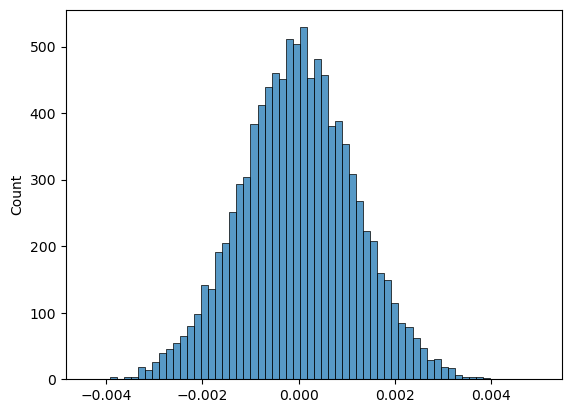

In [59]:
import seaborn as sns
sns.histplot(p_diffs)

In [60]:
# The plot show the sampling distribution of the differnece p_diffs , is normally distributed

# P-value

To get the p-value, I'll find the proportion of difference values in p_diffs that are equal to, or more extreme than (i.e. in favour of the alternative) the actual difference observed from the original data. This would mean differences which are greater than (in accordance with the null hypothesis) the observed difference.

NB: The observed difference is the conversion rate for both the old and new pages as observed from the dat

In [62]:
# get observed differnece first , then determinethe more extreme values in favour of the alternative

obs_diff = (df2[df2.group=='treatment'].converted.mean())-(df2[df2.group=='control'].converted.mean())
p_val = (p_diffs > obs_diff).mean()
p_val

0.9067

Above, I've computed the probability of obtaining our observed statistic, obs_diff, or a more extreme value (in favour of the alternative hypothesis) based on the premise that the null hypothesis is true. This probability is the p-value for the sampling distribution of differences.

Since this value is greater than the our designated significance level of alpha=0.05, then we may conclude that, based on the data, we do not have sufficient evidence in favour of the alternative hypothesis, hence, the result is not statistically significant and we do not reject the null hypothesis. In other words, the difference between the conversion rate for the old page and that of the new page is less than or equal to 0, or otherwise put: the conversion rate for the old page is either greater than or equal to that of the new page.

In [63]:
import statsmodels.api as sm

convert_old = df2[df2.landing_page=='old_page'].converted.sum()
convert_new = df2[df2.landing_page=='new_page'].converted.sum()
n_old = df2[df2.landing_page=='old_page'].shape[0]
n_new = df2[df2.landing_page=='new_page'].shape[0]

In [64]:
test_stat, p_value = sm.stats.proportions_ztest(np.array([convert_old, convert_new]), np.array([n_old, n_new]), alternative='smaller')
print(f"z-score: {test_stat}\np-value: {p_value}") # test_stat is the z-score for our p-value

z-score: 1.3109241984234394
p-value: 0.9050583127590245


The z-score and p-value obtained above imply that there is no statistical evidence to support the change in the webpage, since there is no increase in the conversion rate for the new page (i.e. both pages have similar conversion rates, or old is greater than new) according to the data.

Indeed, these results are in agreement with the findings from the simulated distributions.

In [65]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


A regression approach

In this final part, I will be using regression in order to, hopefully, achieve similar results as in the previous methods.

A logistic regression would be the appropriate kind of regression in this case, as it involves the determination of which category a given dataset falls into (i.e. conversion or no conversion).

The goal here is to use statsmodels to fit a logistic regression model to see if there is a significant difference in conversion as a consequence of which page a customer receives.

To use statsmodels, I'll first need to create a column for the intercept, and create a dummy variable column for which page each user received.

In essence, I'll add an intercept column with all 1's, as well as an ab_page column, which is 1 when an individual receives the new page (treatment) and 0 if they recieved the the old page(control).

In [66]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [67]:
log_mod_1 = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
result_1 = log_mod_1.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [68]:
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:               8.077e-06
Time:                        23:20:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""